In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



In [4]:
data =pd.read_csv(r"C:\Users\lenovo\Downloads\ML\heart_attack_russia_youth_vs_adult.csv")


# Heart_Attack is my target variable.

In [5]:
data.head()

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1.0,50,Male,Rural,110.0,196.5,15.9,76.0,High,False,Moderate,False,False,8.0,False,False,False,Unhealthy,9.4,Unemployed,Low,Low,Primary,Married,Rural,False,5.0,2.3,5.0,False
1,2.0,40,Female,Urban,138.8,157.5,27.1,82.0,Moderate,False,NaN,False,True,5.0,False,True,False,Unhealthy,5.5,Employed,Low,Moderate,Higher,Married,Urban,False,1.0,5.0,4.0,False
2,3.0,26,Male,Rural,116.0,210.1,27.2,71.0,Moderate,False,Moderate,True,False,8.0,False,False,False,Unhealthy,8.8,Employed,Middle,High,Primary,Married,Urban,False,4.0,2.4,8.0,False
3,4.0,54,Female,Rural,133.5,170.5,26.0,74.0,Moderate,True,Moderate,False,True,5.0,False,False,False,Healthy,8.2,Student,Middle,Moderate,Higher,Married,Urban,False,2.0,2.7,6.0,True
4,5.0,19,Female,Urban,108.0,224.5,27.5,67.0,Low,False,NaN,False,True,1.0,False,False,False,Unhealthy,5.9,Employed,Middle,Low,Higher,Widowed,Urban,False,4.0,3.5,4.0,True


In [6]:
data.info() #no inconsistent data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     49970 non-null  float64
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Region                 49972 non-null  object 
 4   Blood_Pressure         49969 non-null  float64
 5   Cholesterol            50000 non-null  float64
 6   BMI                    50000 non-null  float64
 7   Heart_Rate             49909 non-null  float64
 8   Exercise_Level         49820 non-null  object 
 9   Smoking                49897 non-null  object 
 10  Alcohol_Consumption    24904 non-null  object 
 11  Diabetes               49897 non-null  object 
 12  Family_History         49897 non-null  object 
 13  Stress_Level           49886 non-null  float64
 14  Heart_Attack           49897 non-null  object 
 15  An

# Checking redundant columns i.e. ID

In [7]:
data.drop("ID",axis=1,inplace=True)

In [8]:
data.shape

(50000, 29)

In [9]:
data.head(1)

,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,50,Male,Rural,110.0,196.5,15.9,76.0,High,False,Moderate,False,False,8.0,False,False,False,Unhealthy,9.4,Unemployed,Low,Low,Primary,Married,Rural,False,5.0,2.3,5.0,False


# Checking duplicate rows 

In [10]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [11]:
data[data.duplicated()]

,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity


# Checking null values 

In [12]:
data.shape

(50000, 29)

In [13]:
data.isnull().sum()/data.shape[0]*100

Age                       0.000
Gender                    0.000
Region                    0.056
Blood_Pressure            0.062
Cholesterol               0.000
BMI                       0.000
Heart_Rate                0.182
Exercise_Level            0.360
Smoking                   0.206
Alcohol_Consumption      50.192
Diabetes                  0.206
Family_History            0.206
Stress_Level              0.228
Heart_Attack              0.206
Angina                    0.284
Heart_Disease_History     0.142
Diet                      0.142
Sleep_Hours               0.142
Occupation                0.276
Income_Level              0.142
Physical_Activity         0.140
Education_Level           0.140
Marital_Status            0.190
Urban_Rural               0.188
Medication                0.138
Health_Awareness          0.138
Daily_Water_Intake        0.138
Mental_Health             0.138
Obesity                   0.002
dtype: float64

In [14]:
data.Heart_Attack.unique()

array([False, True, nan], dtype=object)

In [15]:
d = data[data["Heart_Attack"].isnull()==True].index

In [16]:
d

Index([ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
       ...
       267, 289, 290, 291, 292, 293, 294, 295, 296, 297],
      dtype='int64', length=103)

In [17]:
data.drop(d,inplace=True)

# Filling null values 

In [18]:
data.isnull().sum()/data.shape[0]*100

Age                       0.000000
Gender                    0.000000
Region                    0.056116
Blood_Pressure            0.000000
Cholesterol               0.000000
BMI                       0.000000
Heart_Rate                0.000000
Exercise_Level            0.154318
Smoking                   0.000000
Alcohol_Consumption      50.089184
Diabetes                  0.000000
Family_History            0.000000
Stress_Level              0.022045
Heart_Attack              0.000000
Angina                    0.090186
Heart_Disease_History     0.002004
Diet                      0.002004
Sleep_Hours               0.002004
Occupation                0.128264
Income_Level              0.002004
Physical_Activity         0.002004
Education_Level           0.002004
Marital_Status            0.044091
Urban_Rural               0.044091
Medication                0.002004
Health_Awareness          0.002004
Daily_Water_Intake        0.002004
Mental_Health             0.002004
Obesity             

In [19]:
for i in data.select_dtypes(include="object"):
    data[i].fillna(data[i].mode()[0],inplace=True)

In [20]:
data.Alcohol_Consumption.mode()[0]

'Moderate'

In [21]:
for i in data.select_dtypes(exclude="object"):
    data[i].fillna(data[i].mean(),inplace=True)

In [22]:
data.isnull().sum()/data.shape[0]*100

Age                      0.0
Gender                   0.0
Region                   0.0
Blood_Pressure           0.0
Cholesterol              0.0
BMI                      0.0
Heart_Rate               0.0
Exercise_Level           0.0
Smoking                  0.0
Alcohol_Consumption      0.0
Diabetes                 0.0
Family_History           0.0
Stress_Level             0.0
Heart_Attack             0.0
Angina                   0.0
Heart_Disease_History    0.0
Diet                     0.0
Sleep_Hours              0.0
Occupation               0.0
Income_Level             0.0
Physical_Activity        0.0
Education_Level          0.0
Marital_Status           0.0
Urban_Rural              0.0
Medication               0.0
Health_Awareness         0.0
Daily_Water_Intake       0.0
Mental_Health            0.0
Obesity                  0.0
dtype: float64

In [23]:
data.Heart_Attack = data["Heart_Attack"].astype(np.number)

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [24]:
x=data.drop("Heart_Attack",axis=1)
y = data.Heart_Attack

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=13)

# Outlier treatment 

In [26]:
for i in xtrain.select_dtypes(include=np.number):
    q1=xtrain[i].quantile(0.25)
    q3=xtrain[i].quantile(0.75)
    iqr=q3-q1
    u=q3+1.5*iqr
    l=q1-1.5*iqr
    xtrain[i]=xtrain[i].clip(lower=l,upper=u)

<Axes: xlabel='Heart_Attack'>

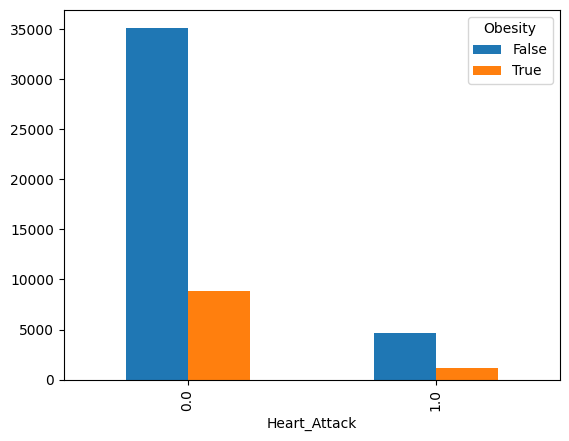

In [56]:
pd.crosstab(data["Heart_Attack"],columns=data["Obesity"]).plot(kind="bar")

Age


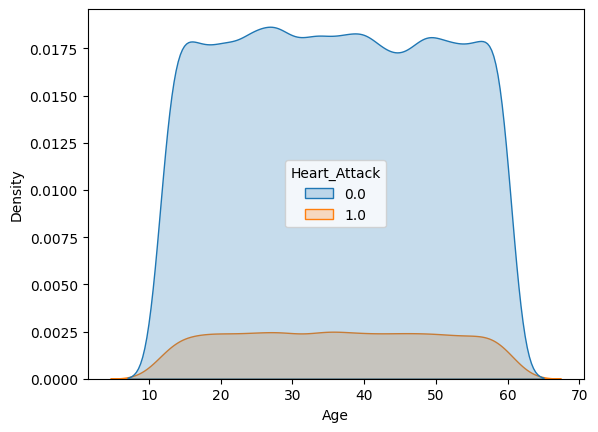

Blood_Pressure


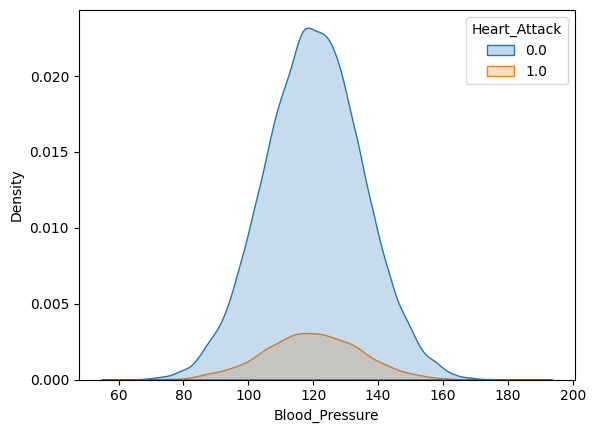

Cholesterol


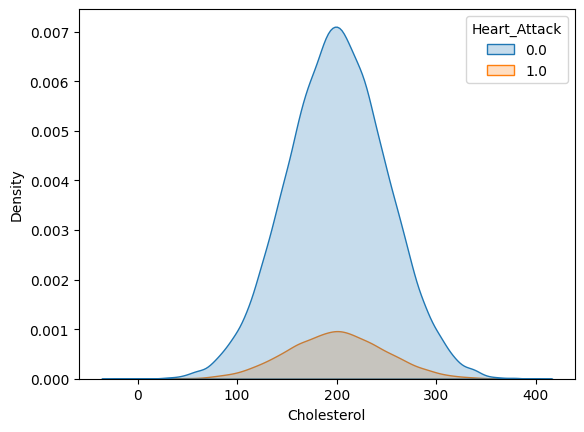

BMI


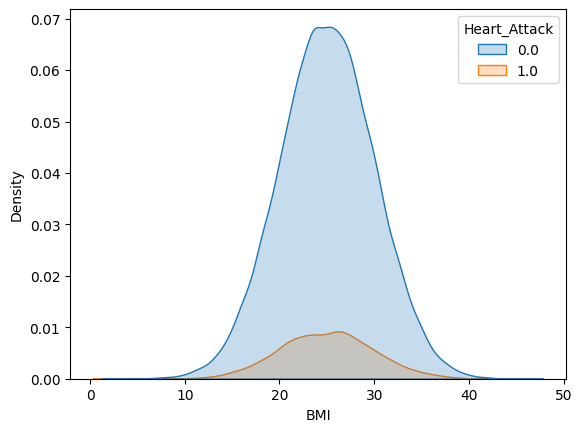

Heart_Rate


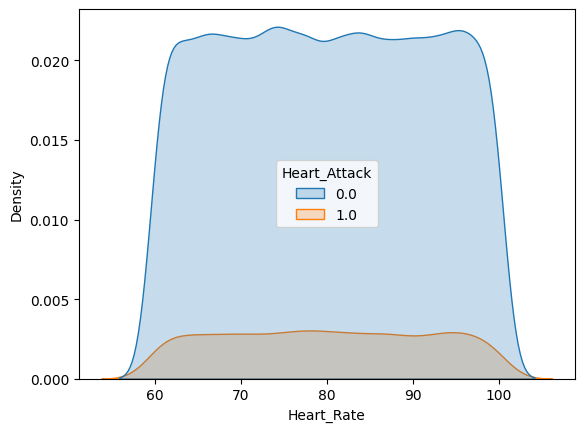

Stress_Level


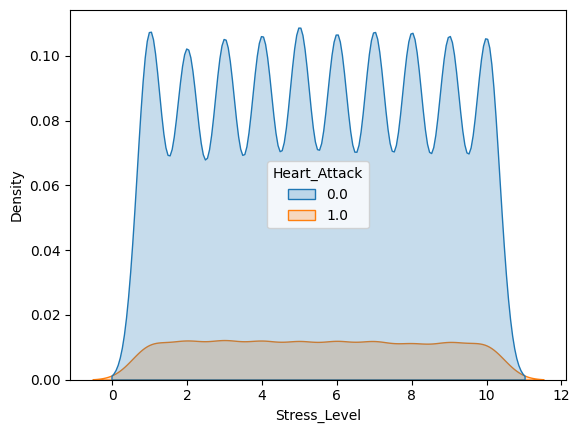

Heart_Attack


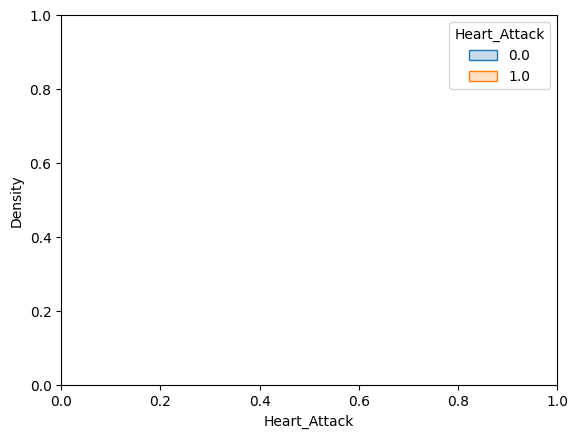

Angina


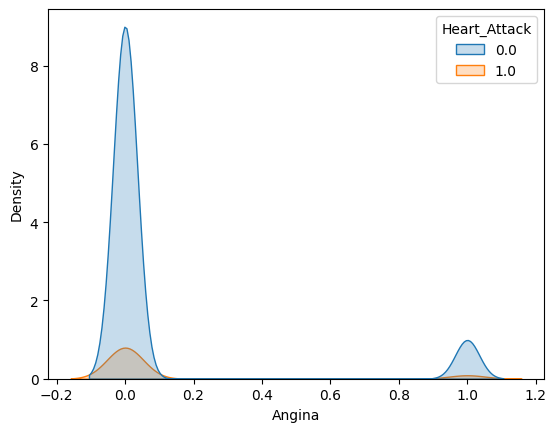

Heart_Disease_History


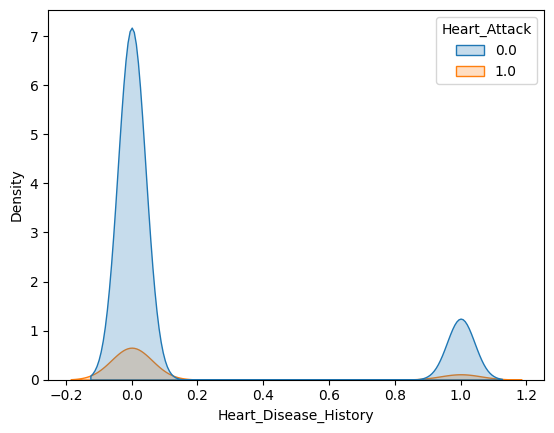

Sleep_Hours


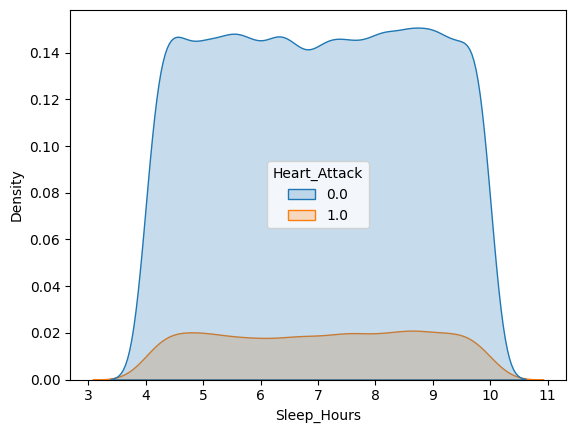

Medication


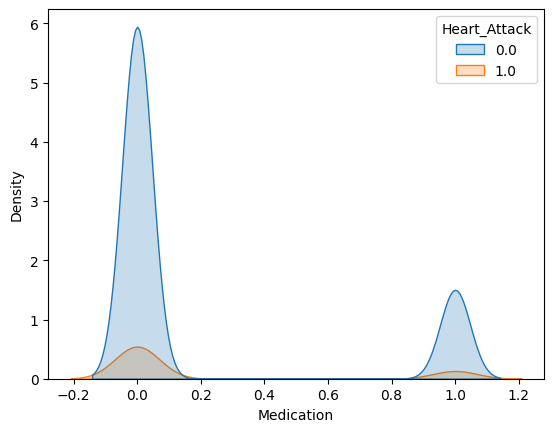

Health_Awareness


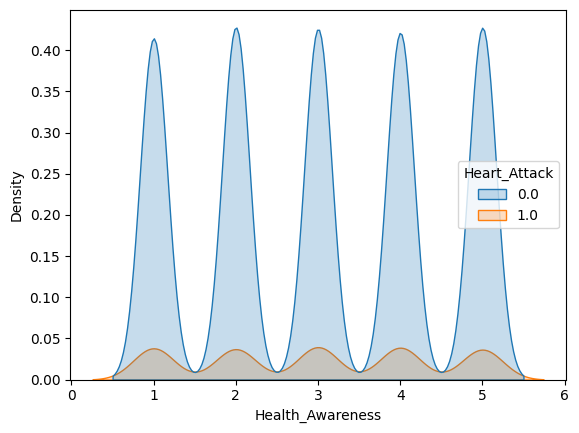

Daily_Water_Intake


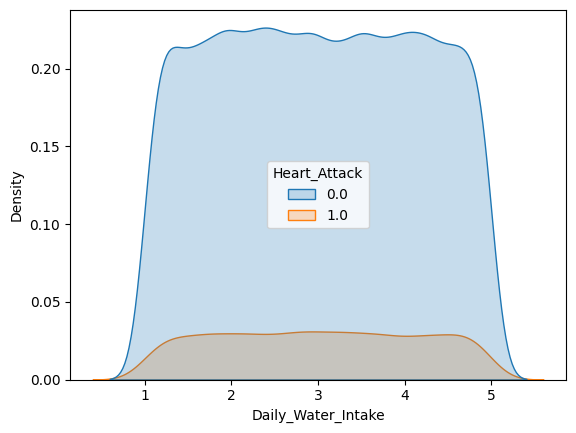

Mental_Health


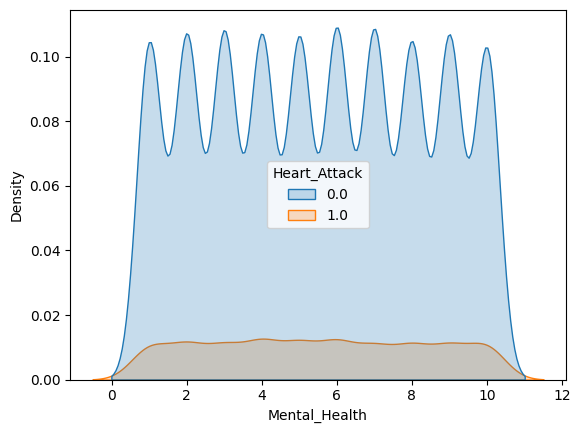

In [ ]:
for i in data.select_dtypes(exclude="object"):
    print(i)  
    sns.kdeplot(x=data[i], hue=data["Heart_Attack"], fill=True)  
    plt.show()

In [27]:
for i in xtrain.select_dtypes(include="object"):
    print(i)
    print(xtrain[i].unique())

Gender
['Male' 'Female' 'Other']
Region
['Urban' 'Suburban' 'Rural']
Exercise_Level
['High' 'Low' 'Moderate']
Smoking
[False True]
Alcohol_Consumption
['Moderate' 'Heavy']
Diabetes
[False True]
Family_History
[False True]
Diet
['Healthy' 'Unhealthy' 'Mixed']
Occupation
['Student' 'Retired' 'Unemployed' 'Employed']
Income_Level
['Middle' 'Low' 'High']
Physical_Activity
['Moderate' 'High' 'Low']
Education_Level
['Primary' 'Higher' 'Secondary']
Marital_Status
['Married' 'Single' 'Widowed' 'Divorced']
Urban_Rural
['Rural' 'Urban']
Obesity
[False True]


## excersie level , alochol consuption , income level , physical activity ,diet 
## education level --- has ordinal data 

In [28]:
ordrinal_data = ["Physical_Activity","Income_Level","Exercise_Level"]

In [29]:
for i in ordrinal_data:
    xtest[i]=xtest[i].apply(lambda x: 3 if x=="High"  else  1 if x=="Low"  else 2)
    xtrain[i]=xtrain[i].apply(lambda x: 3 if x=="High"  else  1 if x=="Low"  else 2)
    

In [30]:
for i in ordrinal_data:
    print(i,xtrain[i].unique(),xtest[i].unique())

Physical_Activity [2 3 1] [3 1 2]
Income_Level [2 1 3] [2 1 3]
Exercise_Level [3 1 2] [3 2 1]


In [31]:
xtest["Diet"]=xtest["Diet"].apply(lambda x: 3 if x=='Healthy'  else  1 if x=='Unhealthy'  else 2)
xtrain["Diet"]=xtrain["Diet"].apply(lambda x: 3 if x=='Healthy'  else  1 if x=='Unhealthy'  else 2)
xtrain["Diet"].unique(),xtest["Diet"].unique()    

(array([3, 1, 2]), array([1, 2, 3]))

In [32]:
xtest["Alcohol_Consumption"]=xtest["Alcohol_Consumption"].apply(lambda x: 3 if x=='Heavy'  else  2)
xtrain["Alcohol_Consumption"]=xtrain["Alcohol_Consumption"].apply(lambda x: 3 if x=='Heavy'  else   2)
xtrain["Alcohol_Consumption"].unique(),xtest["Alcohol_Consumption"].unique()    

(array([2, 3]), array([2, 3]))

In [33]:
for i in xtrain.select_dtypes(include="object"):
    print(i)
    print(xtrain[i].unique())

Gender
['Male' 'Female' 'Other']
Region
['Urban' 'Suburban' 'Rural']
Smoking
[False True]
Diabetes
[False True]
Family_History
[False True]
Occupation
['Student' 'Retired' 'Unemployed' 'Employed']
Education_Level
['Primary' 'Higher' 'Secondary']
Marital_Status
['Married' 'Single' 'Widowed' 'Divorced']
Urban_Rural
['Rural' 'Urban']
Obesity
[False True]


In [34]:
nomial_1= ["Obesity","Smoking","Diabetes","Family_History","Angina","Heart_Disease_History","Medication"]

In [35]:
for i in nomial_1:
    xtrain[i]=xtrain[i].astype(np.int64)
    xtest[i]=xtest[i].astype(np.int64)
    print(i, xtrain[i].unique(),xtest[i].unique())

Obesity [0 1] [0 1]
Smoking [0 1] [0 1]
Diabetes [0 1] [0 1]
Family_History [0 1] [1 0]
Angina [0 1] [0 1]
Heart_Disease_History [0 1] [1 0]
Medication [0 1] [0 1]


In [36]:
Onehot_dummy=[]

In [37]:
for i in xtrain.select_dtypes(include="object"):
    print(i)
    print(xtrain[i].unique())
    Onehot_dummy.append(i)

Gender
['Male' 'Female' 'Other']
Region
['Urban' 'Suburban' 'Rural']
Occupation
['Student' 'Retired' 'Unemployed' 'Employed']
Education_Level
['Primary' 'Higher' 'Secondary']
Marital_Status
['Married' 'Single' 'Widowed' 'Divorced']
Urban_Rural
['Rural' 'Urban']


In [38]:
Onehot_dummy.pop()

'Urban_Rural'

In [39]:
Onehot_dummy

['Gender', 'Region', 'Occupation', 'Education_Level', 'Marital_Status']

In [40]:
for i in Onehot_dummy:
    xtrain = pd.concat([xtrain,pd.get_dummies(xtrain[i]).astype(np.int64)],axis=1)
    xtrain.drop(i,axis=1,inplace=True)
    xtest = pd.concat([xtest,pd.get_dummies(xtest[i]).astype(np.int64)],axis=1)
    xtest.drop(i,axis=1,inplace=True)
    print(xtrain.shape,xtest.shape)

(39917, 30) (9980, 30)


(39917, 32) (9980, 32)
(39917, 35) (9980, 35)
(39917, 37) (9980, 37)
(39917, 40) (9980, 40)


In [41]:
xtrain

,Age,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Angina,Heart_Disease_History,Diet,Sleep_Hours,Income_Level,Physical_Activity,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity,Female,Male,Other,Rural,Suburban,Urban,Employed,Retired,Student,Unemployed,Higher,Primary,Secondary,Divorced,Married,Single,Widowed
14674,35,138.5,210.5,25.2,62.0,3,0,2,0,0,10.0,0,0,3,6.5,2,2,Rural,0,5.0,3.5,8.0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
27505,46,133.4,158.4,29.1,74.0,1,1,2,0,0,7.0,0,0,1,4.5,2,2,Rural,0,1.0,4.2,8.0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
12911,58,101.8,181.8,29.8,65.0,1,0,2,1,0,8.0,0,0,1,9.2,1,2,Urban,0,5.0,4.4,1.0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
9921,47,116.0,168.3,27.9,84.0,1,0,2,0,0,2.0,0,0,1,7.6,1,3,Rural,0,1.0,3.2,2.0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
9711,40,119.5,236.5,26.4,84.0,2,0,2,0,0,3.0,1,0,1,4.6,2,3,Urban,0,3.0,3.5,6.0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22363,24,116.6,262.1,21.4,71.0,1,1,2,0,0,3.0,0,0,2,5.9,1,2,Urban,0,4.0,3.6,2.0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
33737,34,119.6,250.9,27.9,77.0,2,1,2,1,0,6.0,0,0,3,9.3,2,3,Urban,0,1.0,4.0,9.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
32945,32,97.1,154.0,23.6,73.0,2,0,2,0,1,2.0,0,0,2,4.3,1,3,Urban,0,2.0,4.5,7.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
47383,46,110.5,163.5,25.0,81.0,1,0,2,0,0,6.0,0,0,3,4.4,2,2,Rural,0,3.0,2.1,6.0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [42]:
xtest["Urban_Rural"]=xtest["Urban_Rural"].apply(lambda x:0  if x=='Rural'  else   1)
xtrain["Urban_Rural"]=xtrain["Urban_Rural"].apply(lambda x:0  if x=='Rural'  else   1)
xtrain["Urban_Rural"].unique(),xtest["Urban_Rural"].unique()    

(array([0, 1]), array([0, 1]))

In [43]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39917 entries, 14674 to 33209
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    39917 non-null  int64  
 1   Blood_Pressure         39917 non-null  float64
 2   Cholesterol            39917 non-null  float64
 3   BMI                    39917 non-null  float64
 4   Heart_Rate             39917 non-null  float64
 5   Exercise_Level         39917 non-null  int64  
 6   Smoking                39917 non-null  int64  
 7   Alcohol_Consumption    39917 non-null  int64  
 8   Diabetes               39917 non-null  int64  
 9   Family_History         39917 non-null  int64  
 10  Stress_Level           39917 non-null  float64
 11  Angina                 39917 non-null  int64  
 12  Heart_Disease_History  39917 non-null  int64  
 13  Diet                   39917 non-null  int64  
 14  Sleep_Hours            39917 non-null  float64
 15  Inc

In [44]:
xtest.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9980 entries, 10873 to 48458
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    9980 non-null   int64  
 1   Blood_Pressure         9980 non-null   float64
 2   Cholesterol            9980 non-null   float64
 3   BMI                    9980 non-null   float64
 4   Heart_Rate             9980 non-null   float64
 5   Exercise_Level         9980 non-null   int64  
 6   Smoking                9980 non-null   int64  
 7   Alcohol_Consumption    9980 non-null   int64  
 8   Diabetes               9980 non-null   int64  
 9   Family_History         9980 non-null   int64  
 10  Stress_Level           9980 non-null   float64
 11  Angina                 9980 non-null   int64  
 12  Heart_Disease_History  9980 non-null   int64  
 13  Diet                   9980 non-null   int64  
 14  Sleep_Hours            9980 non-null   float64
 15  Inco

<Axes: xlabel='Heart_Attack'>

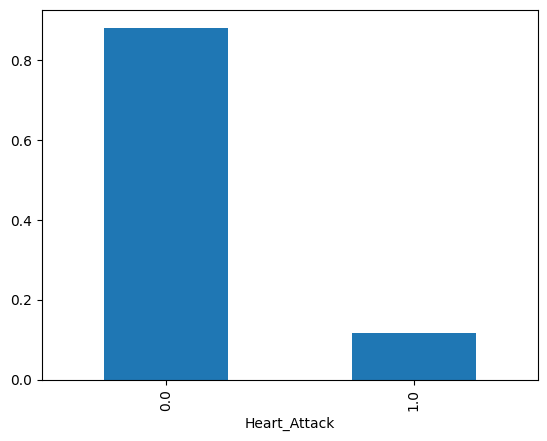

In [53]:
data['Heart_Attack'].value_counts(normalize=True).plot(kind="bar")

In [57]:
xtrain_c = sm.add_constant(xtrain)
xtest_c = sm.add_constant(xtest)

In [59]:
lr = sm.Logit(ytrain,xtrain_c).fit()

Optimization terminated successfully.
         Current function value: 0.359735
         Iterations 6


In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Heart_Attack   No. Observations:                39917
Model:                          Logit   Df Residuals:                    39881
Method:                           MLE   Df Model:                           35
Date:                Tue, 25 Feb 2025   Pseudo R-squ.:                0.001097
Time:                        13:56:42   Log-Likelihood:                -14360.
converged:                       True   LL-Null:                       -14375.
Covariance Type:            nonrobust   LLR p-value:                    0.6357
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.7759   6.37e+05  -1.22e-06      1.000   -1.25e+06    1.25e+06
Age                   -5.079e-05      0.001     -0.046      0.963      -0.002       0.002
Blood_Pressure           -0.0024      0.001     -2.244      0.025      -0.004      -0.000
Cholesterol              -0.0003      0.000     -0.811      0.418      -0.001       0.000
BMI                       0.0017      0.003      0.556      0.578      -0.004       0.008
Heart_Rate               -0.0005      0.001     -0.382      0.702      -0.003       0.002
Exercise_Level           -0.0034      0.022     -0.151      0.880      -0.047       0.040
Smoking                   0.0808      0.034      2.405      0.016       0.015       0.147
Alcohol_Consumption       0.0235      0.052      0.452      0.651      -0.078       0.125
Diabetes                 -0.0637      0.044     -1.433      0.152      -0.151       0.023
Family_History            0.0142      0.032      0.446      0.656      -0.048       0.076
Stress_Level             -0.0058      0.005     -1.073      0.283      -0.017       0.005
Angina                    0.0036      0.052      0.069      0.945      -0.098       0.106
Heart_Disease_History    -0.0526      0.045     -1.179      0.238      -0.140       0.035
Diet                      0.0170      0.019      0.901      0.368      -0.020       0.054
Sleep_Hours               0.0038      0.009      0.419      0.675      -0.014       0.021
Income_Level              0.0175      0.021      0.842      0.400      -0.023       0.058
Physical_Activity         0.0273      0.022      1.231      0.218      -0.016       0.071
Urban_Rural               0.0358      0.032      1.120      0.263      -0.027       0.098
Medication               -0.0501      0.039     -1.274      0.203      -0.127       0.027
Health_Awareness         -0.0028      0.011     -0.257      0.797      -0.025       0.019
Daily_Water_Intake        0.0060      0.014      0.439      0.661      -0.021       0.033
Mental_Health             0.0017      0.005      0.310      0.757      -0.009       0.012
Obesity                   0.0100      0.039      0.258      0.797      -0.066       0.086
Female                   -0.1945        nan        nan        nan         nan         nan
Male                     -0.2119        nan        nan        nan         nan         nan
Other                    -0.3695        nan        nan        nan         nan         nan
Rural                    -0.2658   8.66e+05  -3.07e-07      1.000    -1.7e+06     1.7e+06
Suburban                 -0.2309   8.73e+05  -2.64e-07      1.000   -1.71e+06    1.71e+06
Urban                    -0.2791   8.73e+05   -3.2e-07      1.000   -1.71e+06    1.71e+06
Employed                 -0.1892   1.29e+06  -1.47e-07      1.000   -2.52e+06    2.52e+06
Retired                  -0.2262    1.3e+06  -1.74e-07      1.000   -2.55e+06    2.55e+06
Student                  -0.1572   1.29e+06  -1.22e-07      1.000   -2.53e+06    2.53e+06
U

In [65]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [63]:
lr_test = [1 if x > 0.5 else 0 for x in lr.predict(xtest_c)]

In [64]:
print(classification_report(ytest,lr_test))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      8770
         1.0       0.00      0.00      0.00      1210

    accuracy                           0.88      9980
   macro avg       0.44      0.50      0.47      9980
weighted avg       0.77      0.88      0.82      9980



In [ ]:
s = StandardScaler()


In [67]:
for i in xtrain.columns:
  xtrain[i] = s.fit_transform(xtrain[[i]])
  xtest[i] = s.transform(xtest[[i]])

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier(n_neighbors=5)

In [70]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [71]:
print(classification_report(ytest,knn.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      8770
         1.0       0.11      0.01      0.02      1210

    accuracy                           0.87      9980
   macro avg       0.49      0.50      0.48      9980
weighted avg       0.79      0.87      0.82      9980

